<a href="https://colab.research.google.com/github/Itandewy-Abad/Marketing.AI/blob/main/Marketing_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import cv2
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import plotly.express as px
import plotly.graph_objects as go

from google.colab import files #Librería para cargar ficheros directamente en Colab
%matplotlib inline

In [2]:
# Necesitaremos montar su disco usando los siguientes comandos:
# Para obtener más información sobre el montaje, puedes consultar: https://stackoverflow.com/questions/46986398/import-data-into-google-

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
sales_df = pd.read_csv('/content/drive/My Drive/DataSet/sales_data_sample.csv', encoding = 'unicode_escape')

In [4]:
sales_df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [5]:
sales_df.dtypes

,0
ORDERNUMBER,int64
QUANTITYORDERED,int64
PRICEEACH,float64
ORDERLINENUMBER,int64
SALES,float64
ORDERDATE,object
STATUS,object
QTR_ID,int64
MONTH_ID,int64
YEAR_ID,int64


## MINI RETO #1:


*   Convertir la fecha del pedido en formato de fecha y hora usando pandas.
*   Verificar que la conversió´n es correcta imprimiendo el tipo de datos.



In [6]:
# Convertir la fecha del pedido en formato de fecha y hora
sales_df['ORDERDATE'] = pd.to_datetime(sales_df['ORDERDATE'])

# Comprobar el tipo de datos
sales_df.dtypes

,0
ORDERNUMBER,int64
QUANTITYORDERED,int64
PRICEEACH,float64
ORDERLINENUMBER,int64
SALES,float64
ORDERDATE,datetime64[ns]
STATUS,object
QTR_ID,int64
MONTH_ID,int64
YEAR_ID,int64


## MINI RETO #2:


*   ¿Cuántos elementos nulos existen en 'ADDRESSLINE2'?

In [7]:
# Comprobar el número de elementos no nulos del data frame
sales_df.info()

#Comprobar el número de elementos nulos del data fram
sales_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


In [8]:
df_drop = ['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'CITY', 'TERRITORY', 'PHONE', 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER']
sales_df = sales_df.drop(df_drop, axis = 1)
sales_df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,USA,Medium


In [9]:
sales_df.isnull().sum()

,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0
PRODUCTLINE,0


### MINI RETO #3:


*   ¿Cuántos valores únicos existen en 'país'?
*   ¿Cuántos códigos de producto únicos y líneas de productos tenemos?

In [10]:
# Obtener las observaciones únicas de cada columna
sales_df.nunique()

,0
QUANTITYORDERED,58
PRICEEACH,1016
ORDERLINENUMBER,18
SALES,2763
ORDERDATE,252
STATUS,6
QTR_ID,4
MONTH_ID,12
YEAR_ID,3
PRODUCTLINE,7


## TAREA #3: ANÁLISIS EXPLORATORIO DE LOS DATOS Y LIMPIEZA - PARTE 1

In [11]:
sales_df['COUNTRY'].value_counts().index

Index(['USA', 'Spain', 'France', 'Australia', 'UK', 'Italy', 'Finland',
       'Norway', 'Singapore', 'Canada', 'Denmark', 'Germany', 'Sweden',
       'Austria', 'Japan', 'Belgium', 'Switzerland', 'Philippines', 'Ireland'],
      dtype='object', name='COUNTRY')

In [12]:
sales_df['COUNTRY'].value_counts()

,count
COUNTRY,
USA,1004
Spain,342
France,314
Australia,185
UK,144
Italy,113
Finland,92
Norway,85
Singapore,79


In [13]:
def barplot_visualization(x):
  fig = plt.Figure(figsize = (12, 6))
  fig = px.bar( x = sales_df[x].value_counts().index, y = sales_df[x].value_counts(), color = sales_df[x].value_counts().index, height = 600)
  fig.show()

In [14]:
# Llamamos a esta función para cualquier columna determinada como 'COUNTRY'
barplot_visualization('COUNTRY')

## MINI RETO #4:

*   ¿Cuántos valores de estado de pedido únicos tenemos?
*   ¿Tenemos conjuntos de datos balanceados? Comentar el resultado y proponer soluciones para solucionar el problema.



In [15]:
barplot_visualization('STATUS')

In [16]:
# Aquí vamos a quitar el status porque no nos arroja nada, no nos sirve.

sales_df.drop(columns=['STATUS'], inplace=True)
sales_df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,Motorcycles,95,S10_1678,USA,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,2004-12-02,4,12,2004,Ships,54,S72_3212,Spain,Small
2819,29,100.00,1,3978.51,2005-01-31,1,1,2005,Ships,54,S72_3212,Finland,Medium
2820,43,100.00,4,5417.57,2005-03-01,1,3,2005,Ships,54,S72_3212,Spain,Medium
2821,34,62.24,1,2116.16,2005-03-28,1,3,2005,Ships,54,S72_3212,France,Small


In [17]:
barplot_visualization('PRODUCTLINE')

In [18]:
barplot_visualization('DEALSIZE')

# Aquí visualizamos en dónde se concentran nuestras ventas y en dónde es necesario poner atención y meter marketing.

In [19]:
# Función para agregar variables ficticias para reemplazar variables categóricas

def dummies(x):
  dummy = pd.get_dummies(sales_df[x])
  sales_df.drop(columns = x, inplace = True)
  return pd.concat([sales_df, dummy], axis = 1)

In [20]:
# Obtengamos variables ficticias para la columna 'PAÍS'
sales_df = dummies('COUNTRY')
sales_df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,...,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,Motorcycles,95,...,False,False,False,False,False,False,False,False,False,True
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,Motorcycles,95,...,False,False,False,False,False,False,False,False,False,False
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,Motorcycles,95,...,False,False,False,False,False,False,False,False,False,False
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,Motorcycles,95,...,False,False,False,False,False,False,False,False,False,True
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,Motorcycles,95,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,2004-12-02,4,12,2004,Ships,54,...,False,False,False,False,False,True,False,False,False,False
2819,29,100.00,1,3978.51,2005-01-31,1,1,2005,Ships,54,...,False,False,False,False,False,False,False,False,False,False
2820,43,100.00,4,5417.57,2005-03-01,1,3,2005,Ships,54,...,False,False,False,False,False,True,False,False,False,False
2821,34,62.24,1,2116.16,2005-03-28,1,3,2005,Ships,54,...,False,False,False,False,False,False,False,False,False,False


## MINI RETO #5:
* Obtener dummies para la línea de productos y columnas de tamaño de oferta.
* Realizar una prueba de verificación y ver si la transformación es correcta.

In [21]:
sales_df = dummies('PRODUCTLINE')

In [22]:
sales_df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,...,Switzerland,UK,USA,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,S10_1678,...,False,False,True,False,True,False,False,False,False,False
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,S10_1678,...,False,False,False,False,True,False,False,False,False,False
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,S10_1678,...,False,False,False,False,True,False,False,False,False,False
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,95,S10_1678,...,False,False,True,False,True,False,False,False,False,False
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,95,S10_1678,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,2004-12-02,4,12,2004,54,S72_3212,...,False,False,False,False,False,False,True,False,False,False
2819,29,100.00,1,3978.51,2005-01-31,1,1,2005,54,S72_3212,...,False,False,False,False,False,False,True,False,False,False
2820,43,100.00,4,5417.57,2005-03-01,1,3,2005,54,S72_3212,...,False,False,False,False,False,False,True,False,False,False
2821,34,62.24,1,2116.16,2005-03-28,1,3,2005,54,S72_3212,...,False,False,False,False,False,False,True,False,False,False


In [23]:
# Graficar el 'PRODUCTLINE'

# barplot_visualization('dummies')

# ***No funcionó mi línea de código***

In [24]:
sales_df = dummies('DEALSIZE')
sales_df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,S10_1678,...,False,True,False,False,False,False,False,False,False,True
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,S10_1678,...,False,True,False,False,False,False,False,False,False,True
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,S10_1678,...,False,True,False,False,False,False,False,False,True,False
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,95,S10_1678,...,False,True,False,False,False,False,False,False,True,False
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,95,S10_1678,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,2004-12-02,4,12,2004,54,S72_3212,...,False,False,False,True,False,False,False,False,False,True
2819,29,100.00,1,3978.51,2005-01-31,1,1,2005,54,S72_3212,...,False,False,False,True,False,False,False,False,True,False
2820,43,100.00,4,5417.57,2005-03-01,1,3,2005,54,S72_3212,...,False,False,False,True,False,False,False,False,True,False
2821,34,62.24,1,2116.16,2005-03-28,1,3,2005,54,S72_3212,...,False,False,False,True,False,False,False,False,False,True


In [25]:
y = pd.Categorical(sales_df['PRODUCTCODE'])
y

['S10_1678', 'S10_1678', 'S10_1678', 'S10_1678', 'S10_1678', ..., 'S72_3212', 'S72_3212', 'S72_3212', 'S72_3212', 'S72_3212']
Length: 2823
Categories (109, object): ['S10_1678', 'S10_1949', 'S10_2016', 'S10_4698', ..., 'S700_3962',
                           'S700_4002', 'S72_1253', 'S72_3212']

In [26]:
y = pd.Categorical(sales_df['PRODUCTCODE']).codes
y

array([  0,   0,   0, ..., 108, 108, 108], dtype=int8)

In [27]:
# Dado que el número de código de producto tiene 109 valores únicos, si agregamos variables one-hot,
# serían 109 columnas adicionales, podemos evitarlo usando la codificación categórica.
# Esta no es la forma óptima de lidiar con esto, pero es importante evitar la maldición de la dimensionalidad.

sales_df['PRODUCTCODE'] = pd.Categorical(sales_df['PRODUCTCODE']).codes

In [28]:
sales_df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,0,...,False,True,False,False,False,False,False,False,False,True
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,0,...,False,True,False,False,False,False,False,False,False,True
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,0,...,False,True,False,False,False,False,False,False,True,False
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,95,0,...,False,True,False,False,False,False,False,False,True,False
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,95,0,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,2004-12-02,4,12,2004,54,108,...,False,False,False,True,False,False,False,False,False,True
2819,29,100.00,1,3978.51,2005-01-31,1,1,2005,54,108,...,False,False,False,True,False,False,False,False,True,False
2820,43,100.00,4,5417.57,2005-03-01,1,3,2005,54,108,...,False,False,False,True,False,False,False,False,True,False
2821,34,62.24,1,2116.16,2005-03-28,1,3,2005,54,108,...,False,False,False,True,False,False,False,False,False,True


# TAREA #4: ANÁLISIS EXPLORATORIO DE LOS DATOS Y LIMPIEZA - PARTE 2

In [29]:
# Agrupamos los datos según la fecha del pedido.

sales_df_group = sales_df.groupby(by = "ORDERDATE").sum()
sales_df_group

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
ORDERDATE,,,,,,,,,,,,,,,,,,,,,
2003-01-06,151,288.78,10,12133.25,4,4,8012,363,174,0,...,0,0,0,0,0,0,4,0,2,2
2003-01-09,142,284.96,10,11432.34,4,4,8012,372,181,0,...,0,0,0,0,0,0,4,0,2,2
2003-01-10,80,150.14,3,6864.05,2,2,4006,155,37,0,...,0,0,0,0,0,0,2,0,1,1
2003-01-29,541,1417.54,136,54702.00,16,16,32048,1695,723,0,...,3,0,0,0,0,7,6,0,10,6
2003-01-31,443,1061.89,91,44621.96,13,13,26039,1365,720,0,...,7,0,0,0,2,4,0,0,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-05-13,259,561.18,21,31821.90,12,30,12030,728,101,0,...,0,6,0,0,0,0,0,2,3,1
2005-05-17,509,1269.43,105,59475.10,28,70,28070,1669,462,0,...,14,0,0,0,0,0,0,2,8,4
2005-05-29,607,1148.40,94,51233.18,30,75,30075,1328,797,13,...,7,0,0,0,0,0,8,0,8,7


## MINI RETO #6:
* Según los datos, ¿cuándo alcanzan su punto máximo las ventas (en qué mes)?
* Apoya tu respuesta con visualizaciones / gráficos.

In [30]:
fig = px.line(x = sales_df_group.index, y = sales_df_group.SALES, title = 'Sales')
fig.show()

In [31]:
# Podemos eliminar 'ORDERDATE' y quedarnos con el resto de datos relacionados con la fecha como 'MONTH'
sales_df.drop("ORDERDATE", axis = 1, inplace = True)
sales_df.shape

(2823, 38)

## MINI RETO #7:
* Representar la matriz de correlación entre variables.
* Comentar los resultado de la matriz.

<Axes: >

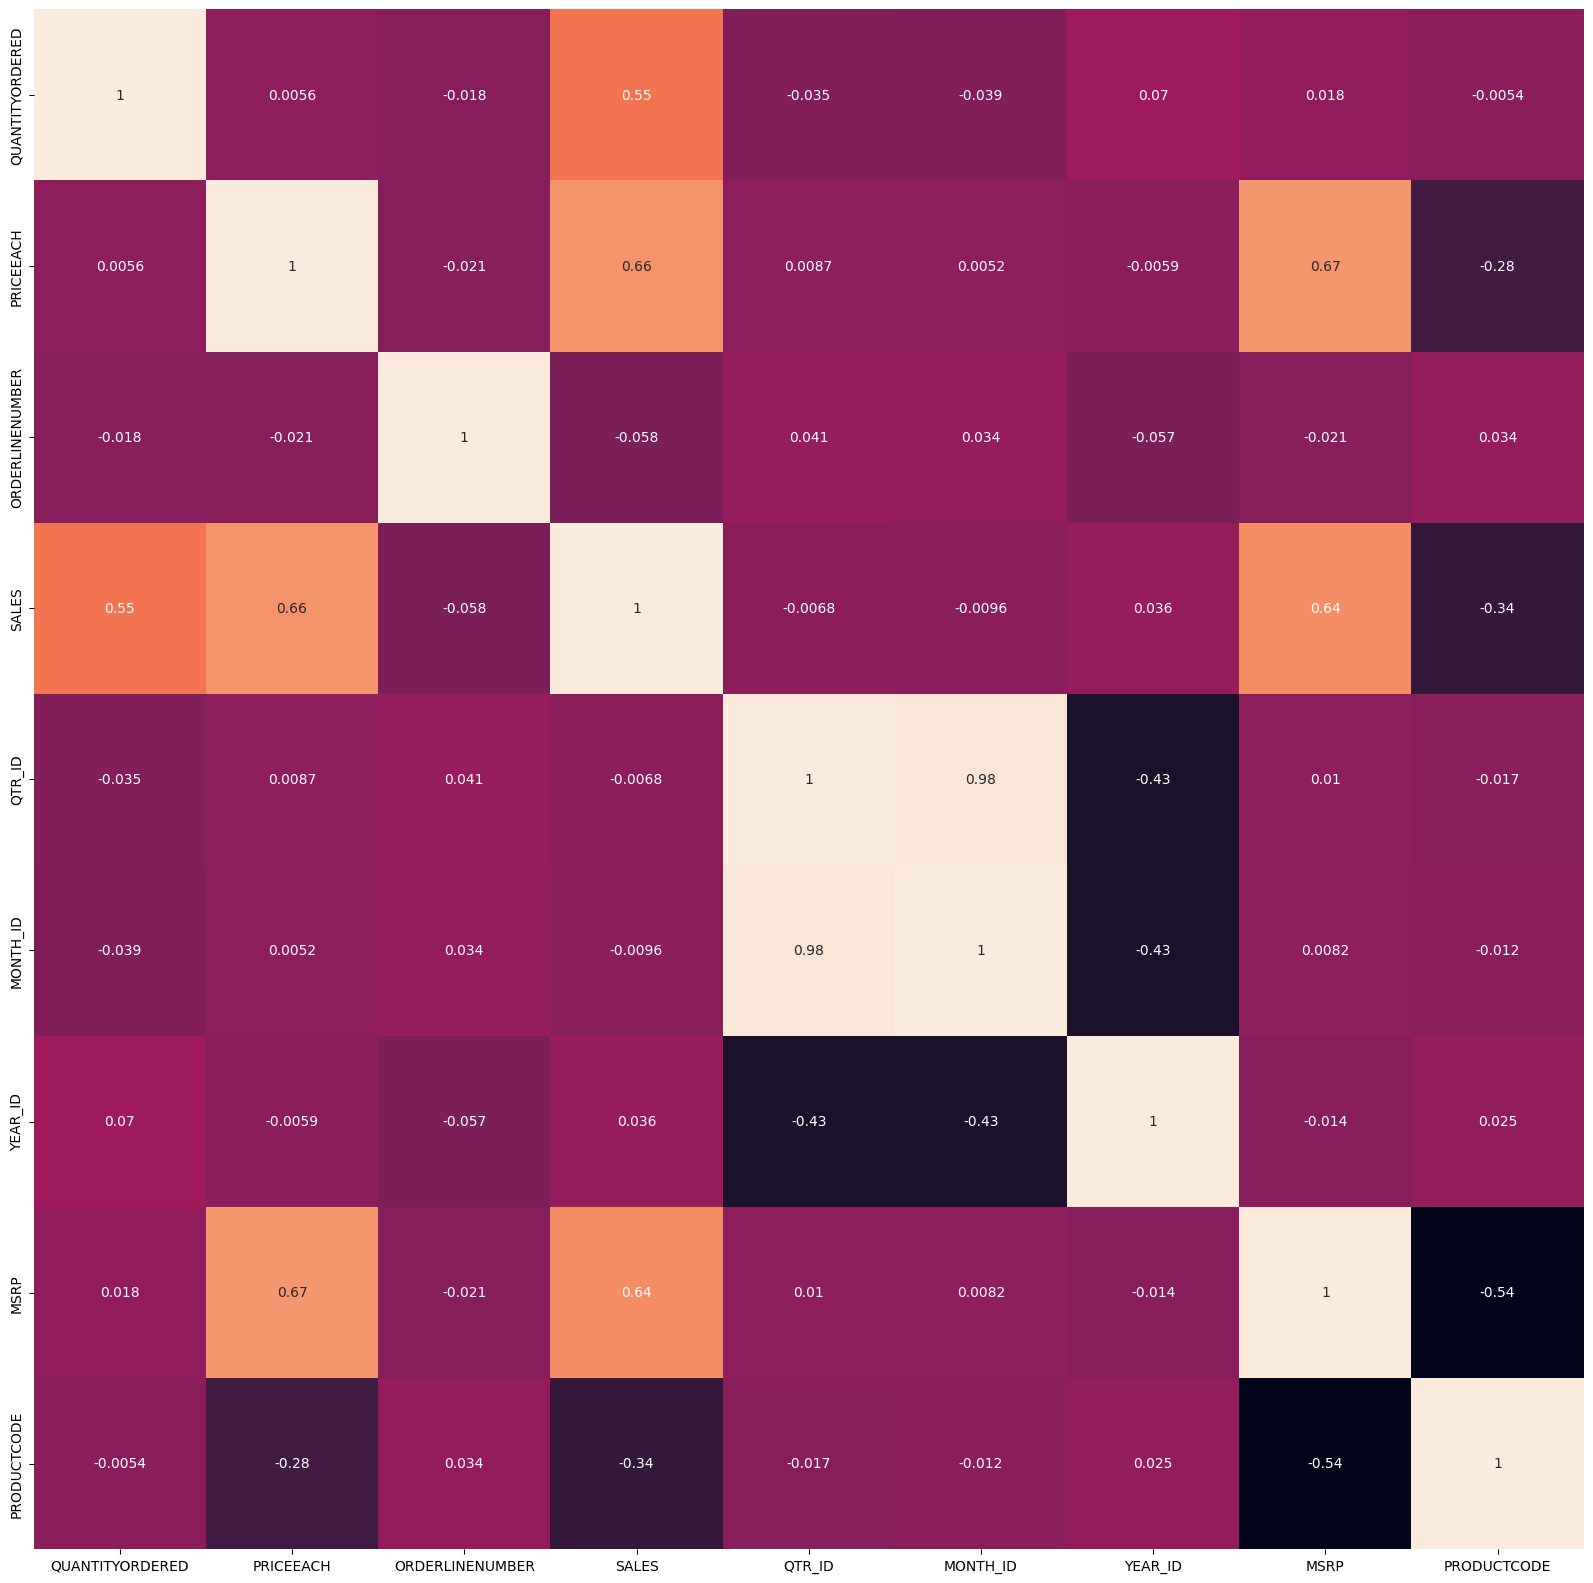

In [32]:
plt.figure(figsize = (20, 20))
corr_matrix = sales_df.iloc[:, :9].corr()
sns.heatmap(corr_matrix, annot = True, cbar = False)

In [33]:
# Parece que el ID del trimestre y el ID del mes están altamente correlacionados.
# Dejemos 'QTR_ID' (o 'MONTH_ID')
sales_df.drop("QTR_ID", axis = 1, inplace = True)
sales_df.shape

(2823, 37)

In [34]:
# Vamos a respresentar distribuciones
# Displot muestra el (1) histograma, (2) kde plot y (3) rug plot.
# (1) Histogramas: es una visualización gráfica de datos que usa barras con varias alturas. Cada barra agrupa los números en rangos.
# (2) Densidad: la estimación de la función de densidad se utiliza para visualizar la densidad de probabilidad de una variable continua.
# (3) Gráfico de alfombra: gráfico de datos para una única variable cuantitativa, que se muestra como marcas a lo largo de un eje (gráfico de dispersión unidimensional).

import plotly.figure_factory as ff

plt.figure(figsize = (10, 10))

for i in range(8):
  if sales_df.columns[i] != 'ORDERLINENUMBER':
    col_name = sales_df.columns[i]
    fig = ff.create_distplot([sales_df[col_name].apply(lambda x: float(x))], ['displot'])
    fig.update_layout(title_text = col_name)
    fig.show()

<Figure size 1000x1000 with 0 Axes>

In [35]:
# Visualizar la relación entre variables usando parcelas
plt.figure(figsize = (15, 15))

fig = px.scatter_matrix(sales_df, dimensions = sales_df.columns[:8], color = 'MONTH_ID')

fig.update_layout(
    title = 'Sales Data',
    width = 1100,
    height = 1100,
)

fig.show()

# Existe una tendencia entre 'SALES' y 'QUANTITYORDER'
# Existe una tendencia entre 'MSRP' y 'PRICEEACH'
# Existe una tendencia entre 'PRICEEACH' y 'SALES'
# Parece que el crecimiento de las ventas se nota a medida que pasamos de 2013 a 2014 y a 2015 ('VENTAS' )
# Si hacemos zoom en 'VENTAS' y 'CANTIDAD ORDENADA', se puede ver la información mensual codificada por co

<Figure size 1500x1500 with 0 Axes>

# TAREA #5:

# TAREA #6: ENCUENTRE EL NÚMERO ÓPTIMO DE CLUSTERS UTILIZANDO EL MÉTODO DE CODO

* El método del codo es un método heurístico de interpretación y validación de la coherencia dentro del análisis de conglomerados diseñado para ayudar a encontrar el número apropiado de clusters en un conjunto de datos.
* Si el gráfico de líneas se parece a un brazo, entonces el 'codo' en el brazo es el valor de k que es el mejor.
* Fuente:
  * https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  * https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [37]:
# Escalamos los datos
scaler = StandardScaler()
sales_df_scaled = scaler.fit_transform(sales_df)

In [38]:
sales_df_scaled.shape

(2823, 37)

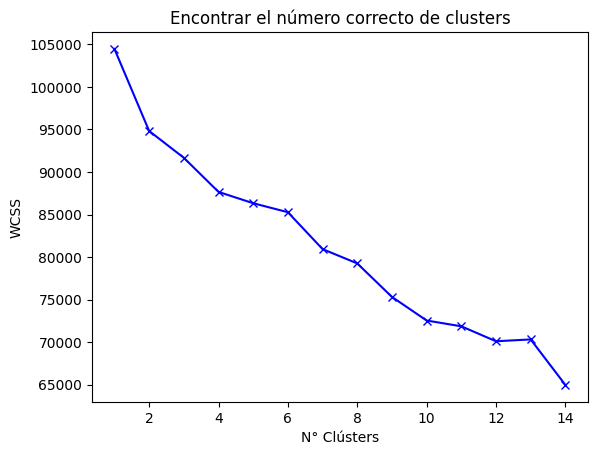

In [41]:
scores = []

range_values = range(1, 15)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(sales_df_scaled)
  scores.append(kmeans.inertia_) # La inercia es la suma de los de¿¿cuadrados de las distancias de las observaciones al centro del clúster más cercano

plt.plot(range_values, scores, 'bx-')
plt.title('Encontrar el número correcto de clusters')
plt.xlabel('N° Clústers')
plt.ylabel('WCSS')
plt.show()

# Detalles de Kmeans en Sklearn: https://scikit.learn

# TAREA #7: APLICAR EL MÉTODO K-MEANS

In [42]:
# Agrupar los datos usando k-means
kmeans = KMeans(5)
kmeans.fit(sales_df_scaled)
labels = kmeans.labels_

In [43]:
labels

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [44]:
kmeans.cluster_centers_.shape

(5, 37)

In [49]:
# Echemos un vistazo a los centros de los clústers
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [sales_df.columns])
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,0.332302,0.526142,-0.154977,0.579451,-0.132569,0.127370,0.402373,-0.364090,-0.119633,-0.054312,...,-0.330653,1.552643,-0.194581,-0.300637,-0.112311,-0.132052,-0.341180,0.240705,0.606424,-0.719672
1,0.360928,0.619936,-0.029155,0.695668,0.033129,-0.029334,0.551789,-0.319367,0.035056,0.048921,...,0.323213,-0.364452,0.003561,-0.300637,-0.039669,0.117816,0.038336,0.207495,0.806061,-0.904830
2,-0.459012,-0.796859,0.057772,-0.832364,0.014709,0.000760,-0.614724,0.208938,0.061837,-0.022675,...,-0.103620,-0.011557,0.139234,-0.300637,0.094621,0.004729,0.184077,-0.242672,-0.980703,1.096370
3,-0.013729,0.022772,0.101603,-0.261925,-0.035235,0.030410,-0.360351,1.116637,-0.228082,-0.009413,...,-0.721812,-0.364452,-0.348674,3.326275,-0.167454,-0.345470,-0.523371,-0.242672,-0.062347,0.174300
4,-0.022567,0.183672,-0.031440,0.187405,-0.012264,-0.280243,0.189983,-0.018958,-0.264819,-0.140961,...,0.415414,-0.364452,-0.246557,0.505344,0.222340,-0.242611,-0.252919,0.172896,0.003610,-0.083208


In [51]:
# Para entender lo que significan estos números, realicemos una transformación inversa
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [sales_df.columns])
cluster_centers

# Clúster 0 (más alto): este grupo representa a los clientes que compran artículos en una gran cantidad centrada en ~ 47, compran artículos en todos los rangos de precios inclinándose hacia artículos de alto precio de ~ 99. También corresponden a las ventas totales más altas alrededor de ~ 8296 y están activas durante todo el año. Son los mayores compradores de productos con un MSRP alto ~ 158.
# Clúster 1: este grupo representa a los clientes que compran artículos en cantidades variables ~ 35, tienden a comprar artículos de alto precio ~ 96. Sus ventas son un poco mejores en promedio ~ 4435, compran productos con el segundo MSRP más alto de ~ 133.
# Clúster 2 (más bajo): este grupo representa a los clientes que compran artículos en cantidades bajas ~ 30. Suelen comprar artículos de bajo precio ~ 68. Sus ventas ~ 2044 son más bajas que las de otros grupos y son extremadamente activos durante la temporada navideña. Compran productos con un MSRP bajo ~ 75.
# Clúster 3: este grupo representa a los clientes que solo están activos durante las vacaciones. compran en menor cantidad ~ 35, pero tienden a comprar artículos de precio promedio alrededor de ~ 86. También corresponden a ventas totales más bajas alrededor de ~ 3673, tienden a comprar artículos con MSRP alrededor de 102.
# Clúster 4: este grupo representa a los clientes que compran artículos en cantidad variable ~ 39, tienden a comprar artículos de precio promedio ~ 94. Sus ventas ~ 4280.

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,38.329341,94.271198,5.811377,4620.970210,6.607784,2003.904192,116.883234,42.275449,3.592814e-02,1.197605e-02,...,1.856287e-01,6.167665e-01,4.790419e-02,5.828671e-16,8.982036e-03,6.586826e-02,7.485030e-02,1.107784e-01,7.934132e-01,0.095808
1,38.608145,96.163095,6.342986,4834.988027,7.213575,2003.794570,122.886878,43.687783,7.420814e-02,2.624434e-02,...,4.959276e-01,-1.817990e-15,1.095023e-01,-3.469447e-16,2.081448e-02,1.429864e-01,2.307692e-01,1.031674e-01,8.932127e-01,0.003620
2,30.622162,67.585332,6.710263,2021.059046,7.146231,2003.815622,76.015441,60.371480,8.083560e-02,1.634877e-02,...,2.933697e-01,1.135332e-01,1.516803e-01,-3.330669e-16,4.268847e-02,1.080836e-01,2.906449e-01,6.800116e-16,-1.054712e-15,1.000000
3,34.959091,84.117864,6.895455,3071.544864,6.963636,2003.836364,86.236364,89.036364,9.090909e-03,1.818182e-02,...,3.885781e-16,-3.469447e-16,8.326673e-17,1.000000e+00,-1.249001e-16,6.938894e-17,5.551115e-16,-1.873501e-16,4.590909e-01,0.540909
4,34.873016,87.363333,6.333333,3899.002381,7.047619,2003.619048,108.349206,53.174603,1.387779e-17,6.938894e-18,...,5.396825e-01,8.326673e-17,3.174603e-02,2.222222e-01,6.349206e-02,3.174603e-02,1.111111e-01,9.523810e-02,4.920635e-01,0.412698


In [52]:
labels.shape # Etiquetas del clúster asociado a cada observación

(2823,)

In [54]:
labels.max()

np.int32(4)

In [55]:
labels.min()

np.int32(0)

In [56]:
y_kmeans = kmeans.fit_predict(sales_df_scaled)
y_kmeans

array([2, 2, 1, ..., 3, 3, 3], dtype=int32)

In [ ]:
y_kmeans.shape

In [58]:
# Agregar una etiqueta (qué clúster) correspondiente a cada punto de datos
sale_df_cluster = pd.concat([sales_df, pd.DataFrame({'cluster': labels})], axis = 1)
sale_df_cluster

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small,cluster
0,30,95.70,2,2871.00,2,2003,95,0,False,False,...,True,False,False,False,False,False,False,False,True,0
1,34,81.35,5,2765.90,5,2003,95,0,False,False,...,True,False,False,False,False,False,False,False,True,0
2,41,94.74,2,3884.34,7,2003,95,0,False,False,...,True,False,False,False,False,False,False,True,False,0
3,45,83.26,6,3746.70,8,2003,95,0,False,False,...,True,False,False,False,False,False,False,True,False,0
4,49,100.00,14,5205.27,10,2003,95,0,False,False,...,True,False,False,False,False,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,12,2004,54,108,False,False,...,False,False,True,False,False,False,False,False,True,3
2819,29,100.00,1,3978.51,1,2005,54,108,False,False,...,False,False,True,False,False,False,False,True,False,3
2820,43,100.00,4,5417.57,3,2005,54,108,False,False,...,False,False,True,False,False,False,False,True,False,3
2821,34,62.24,1,2116.16,3,2005,54,108,False,False,...,False,False,True,False,False,False,False,False,True,3


In [59]:
sales_df['ORDERLINENUMBER'] = sales_df['ORDERLINENUMBER'].apply(lambda x: float(x))

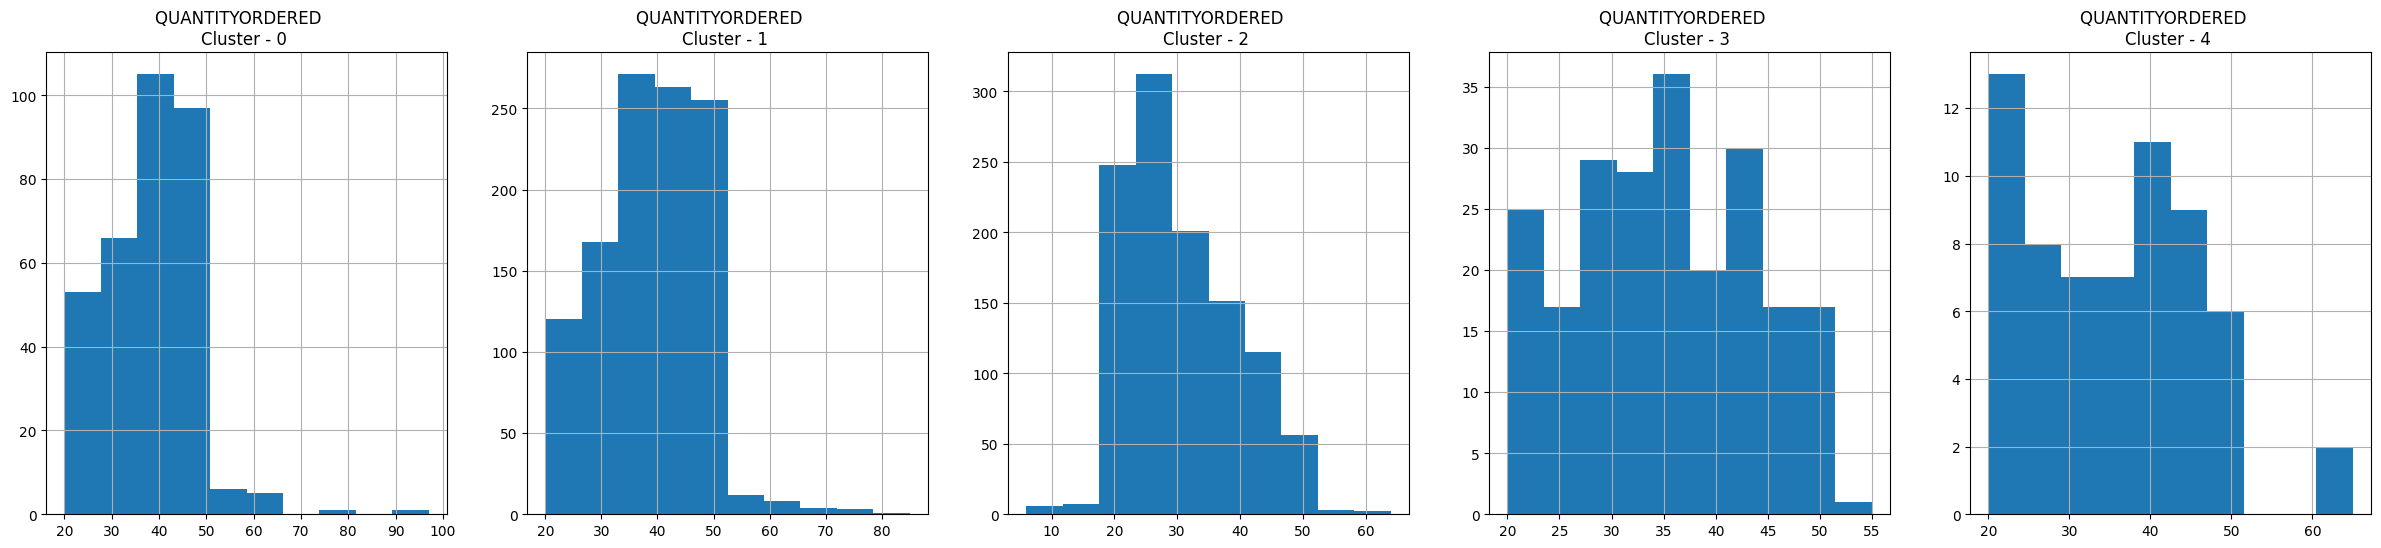

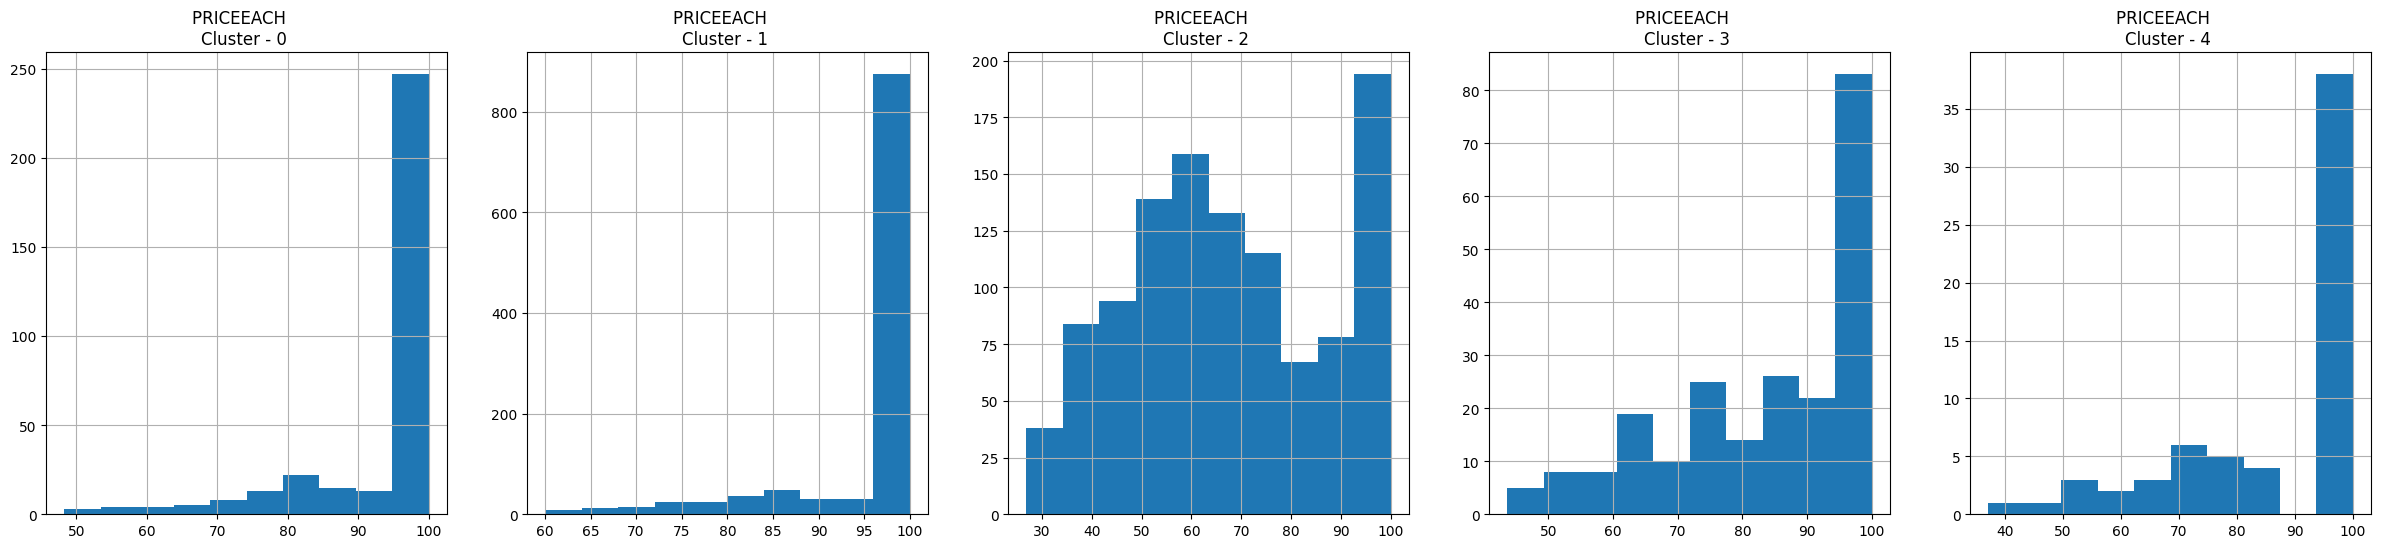

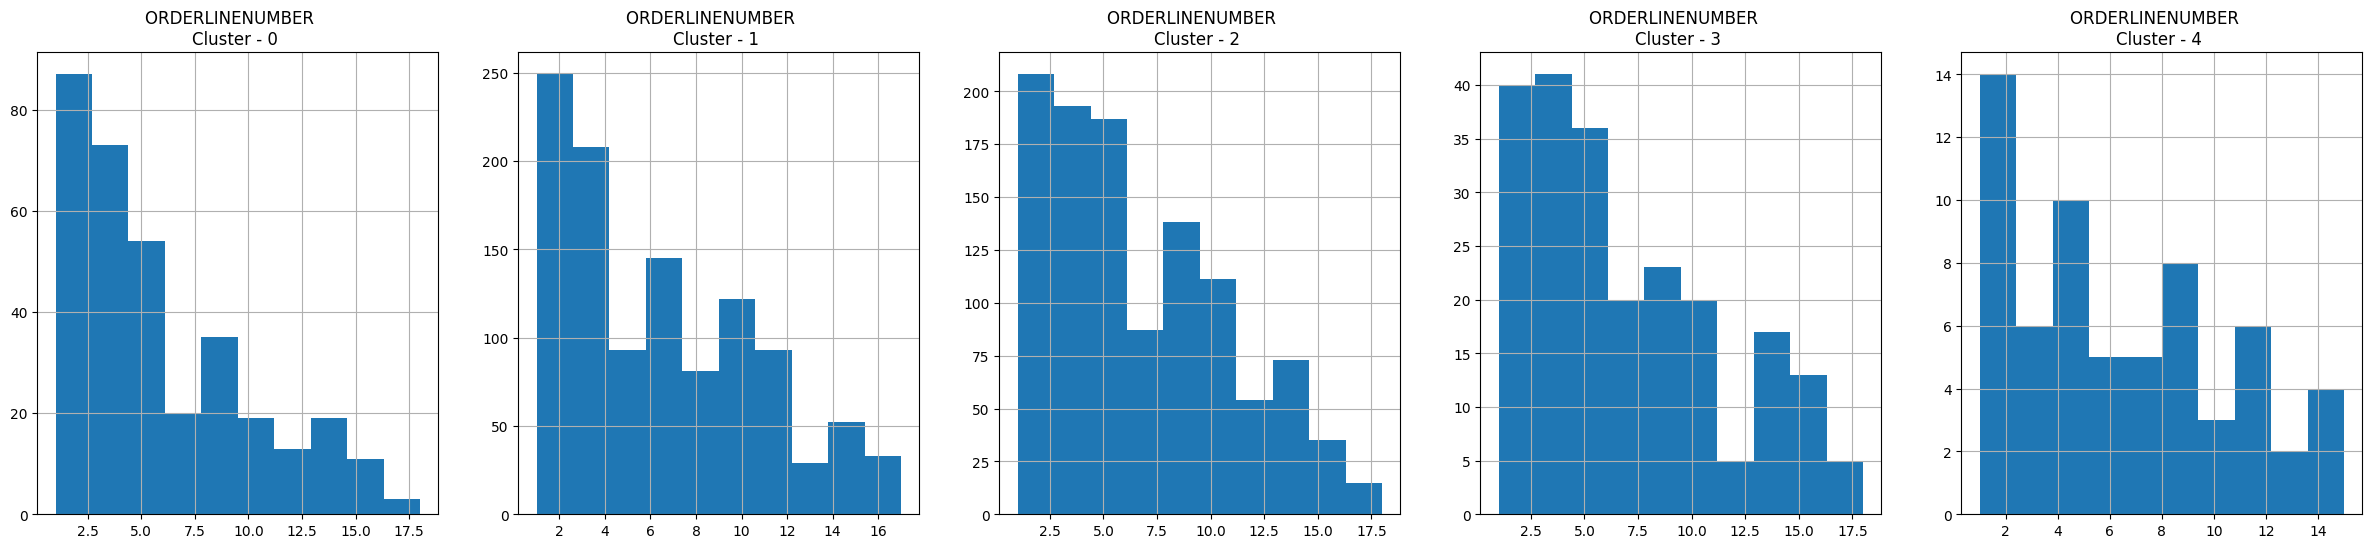

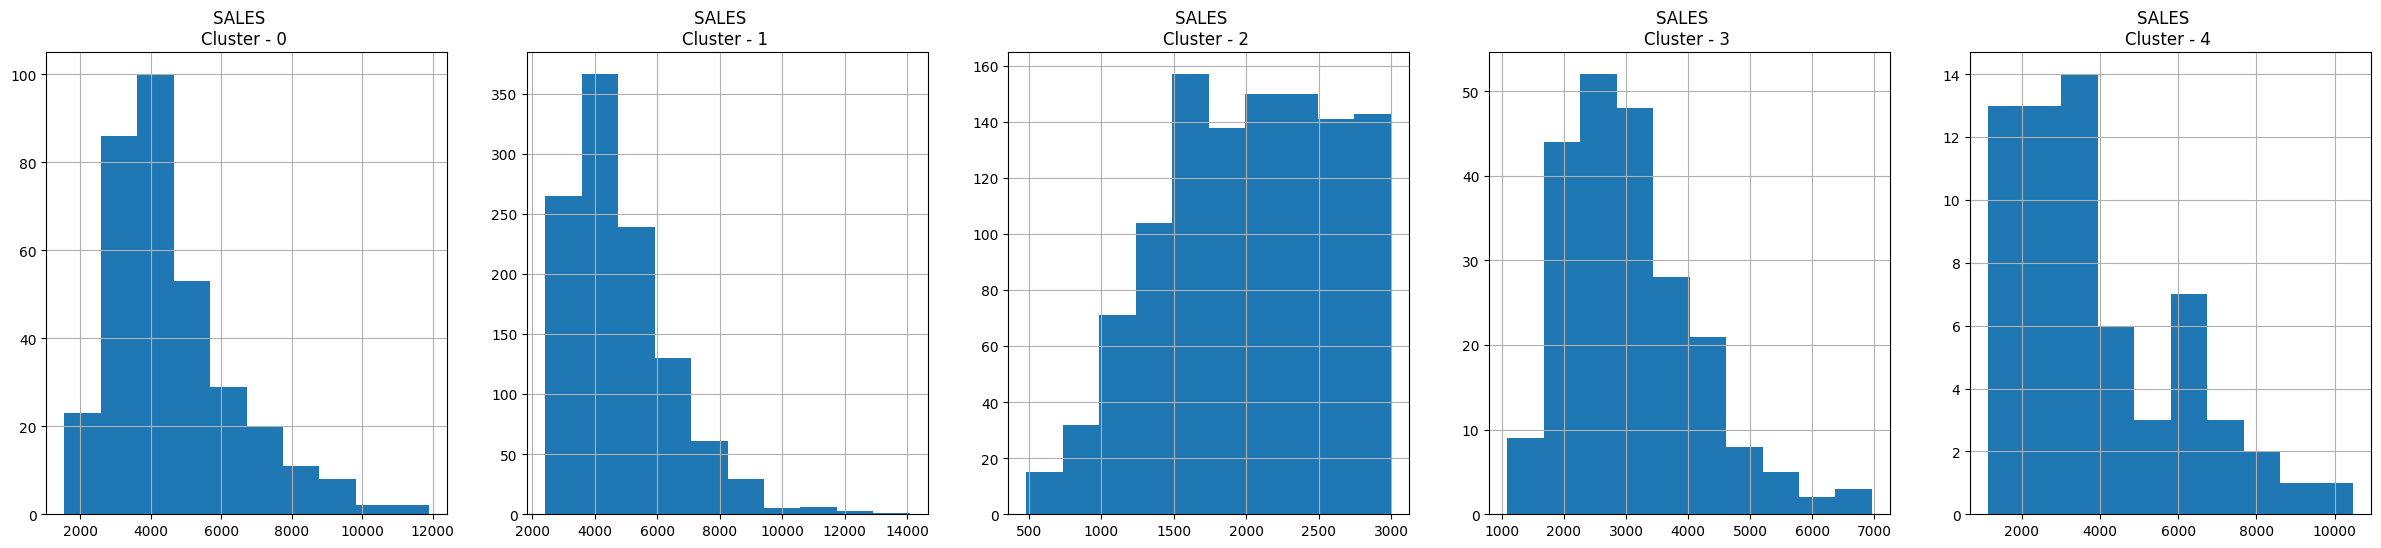

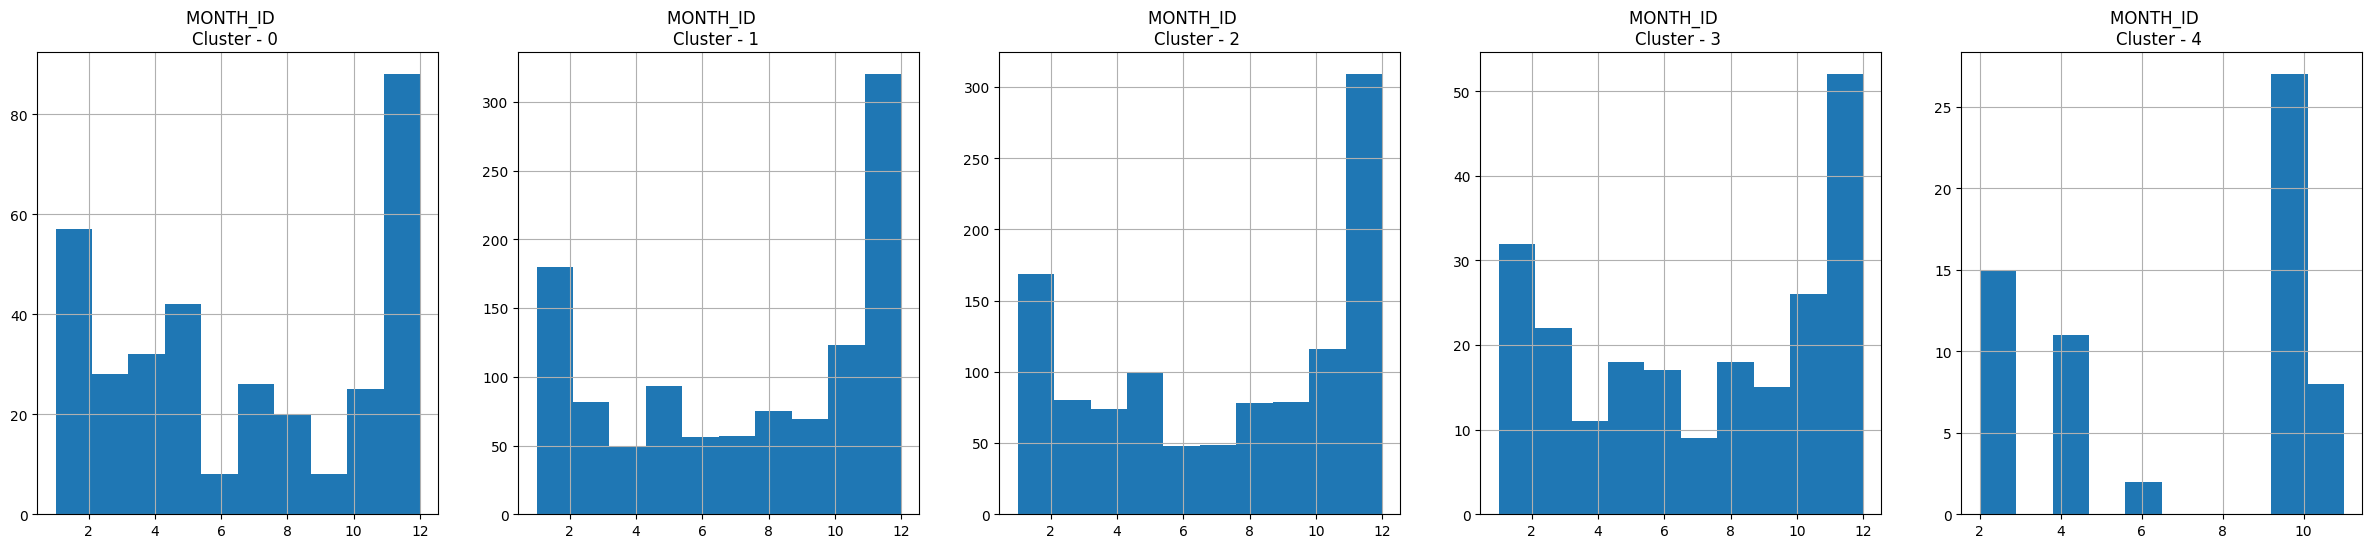

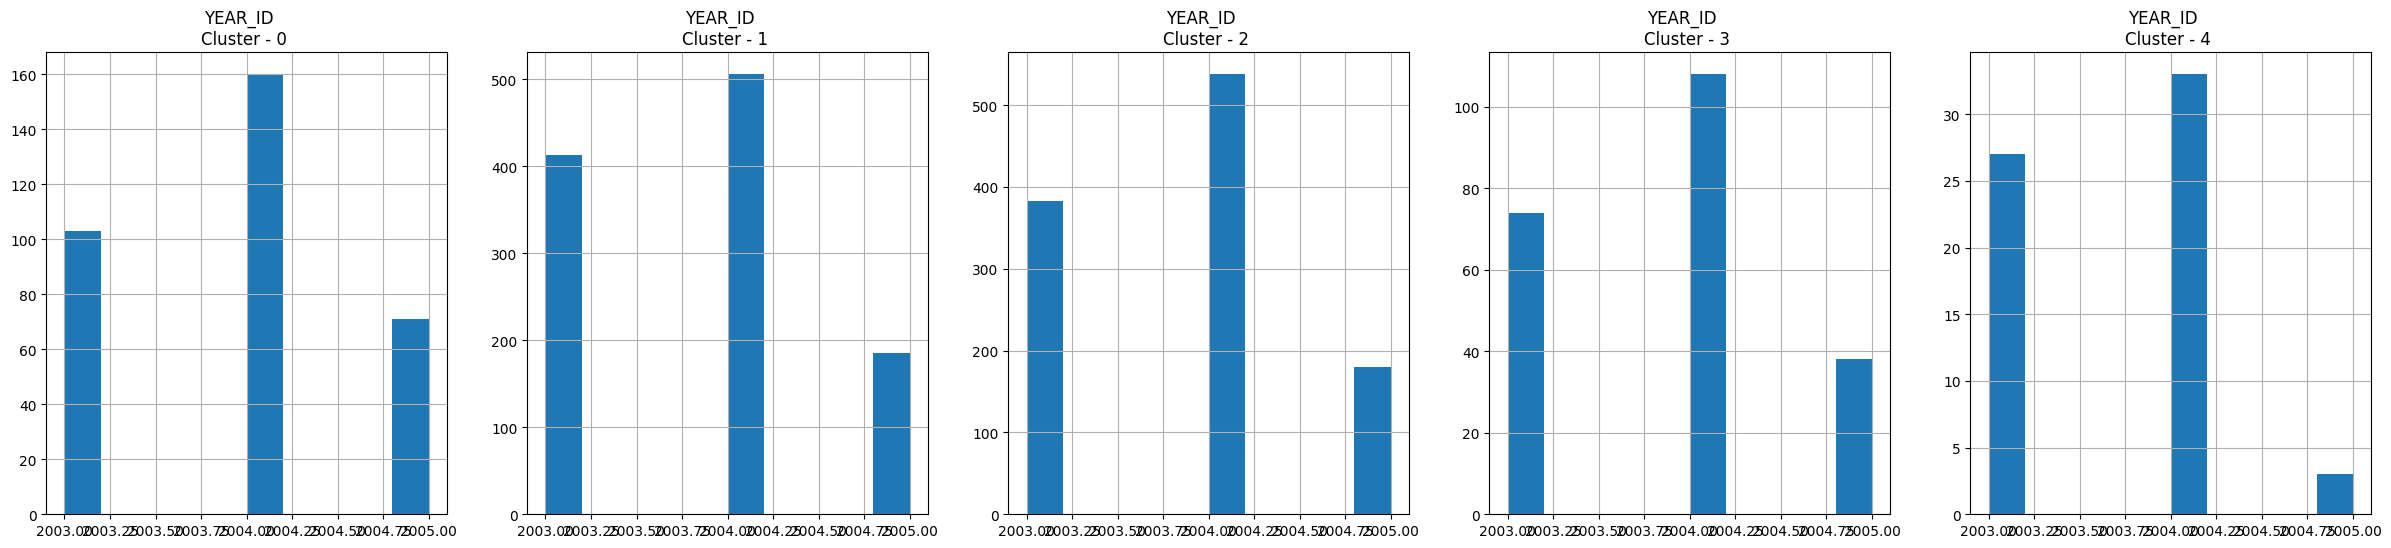

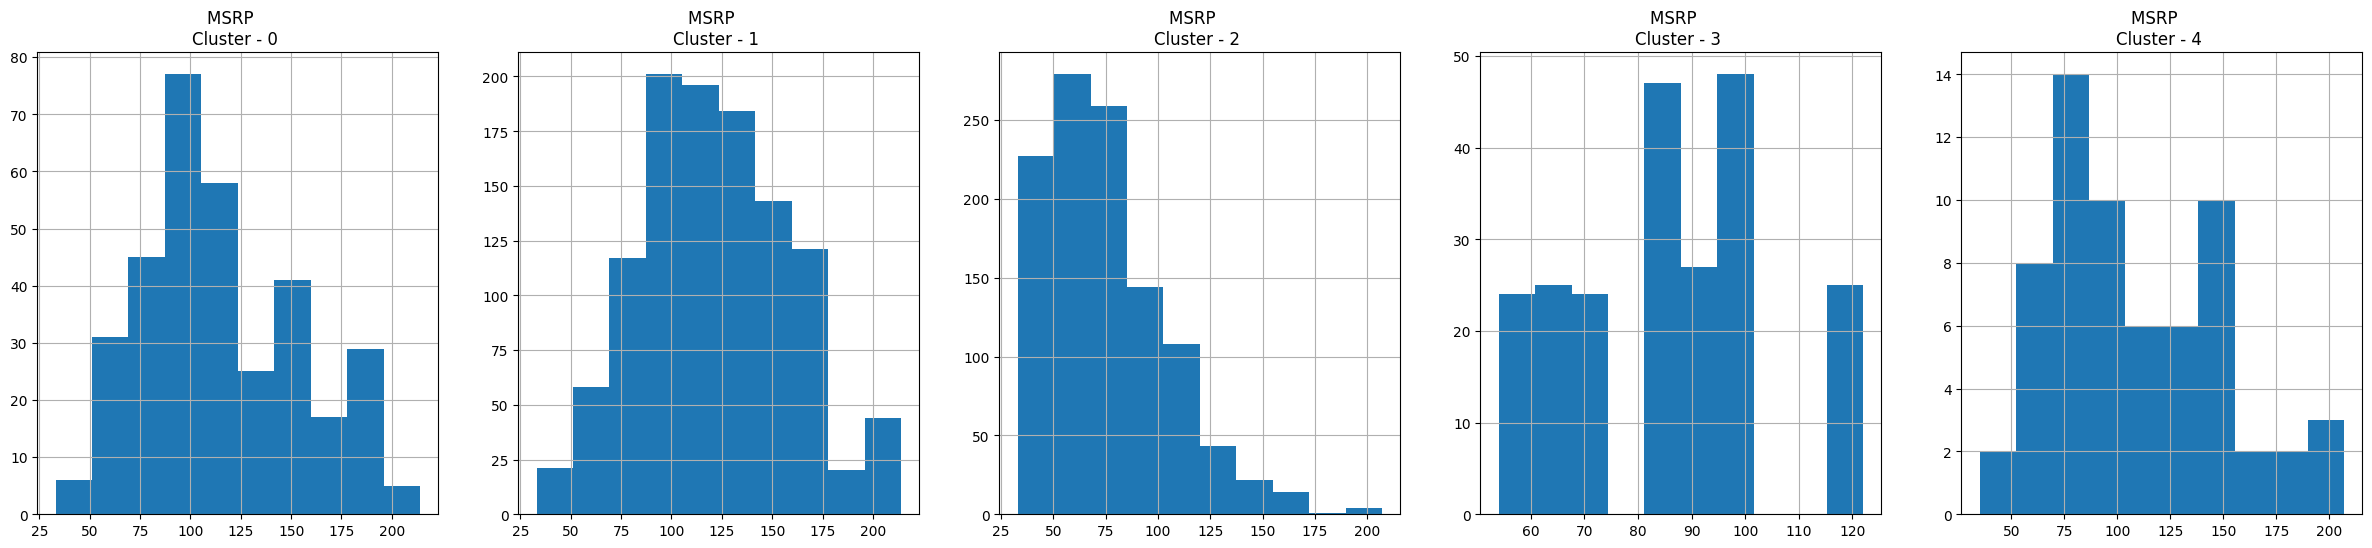

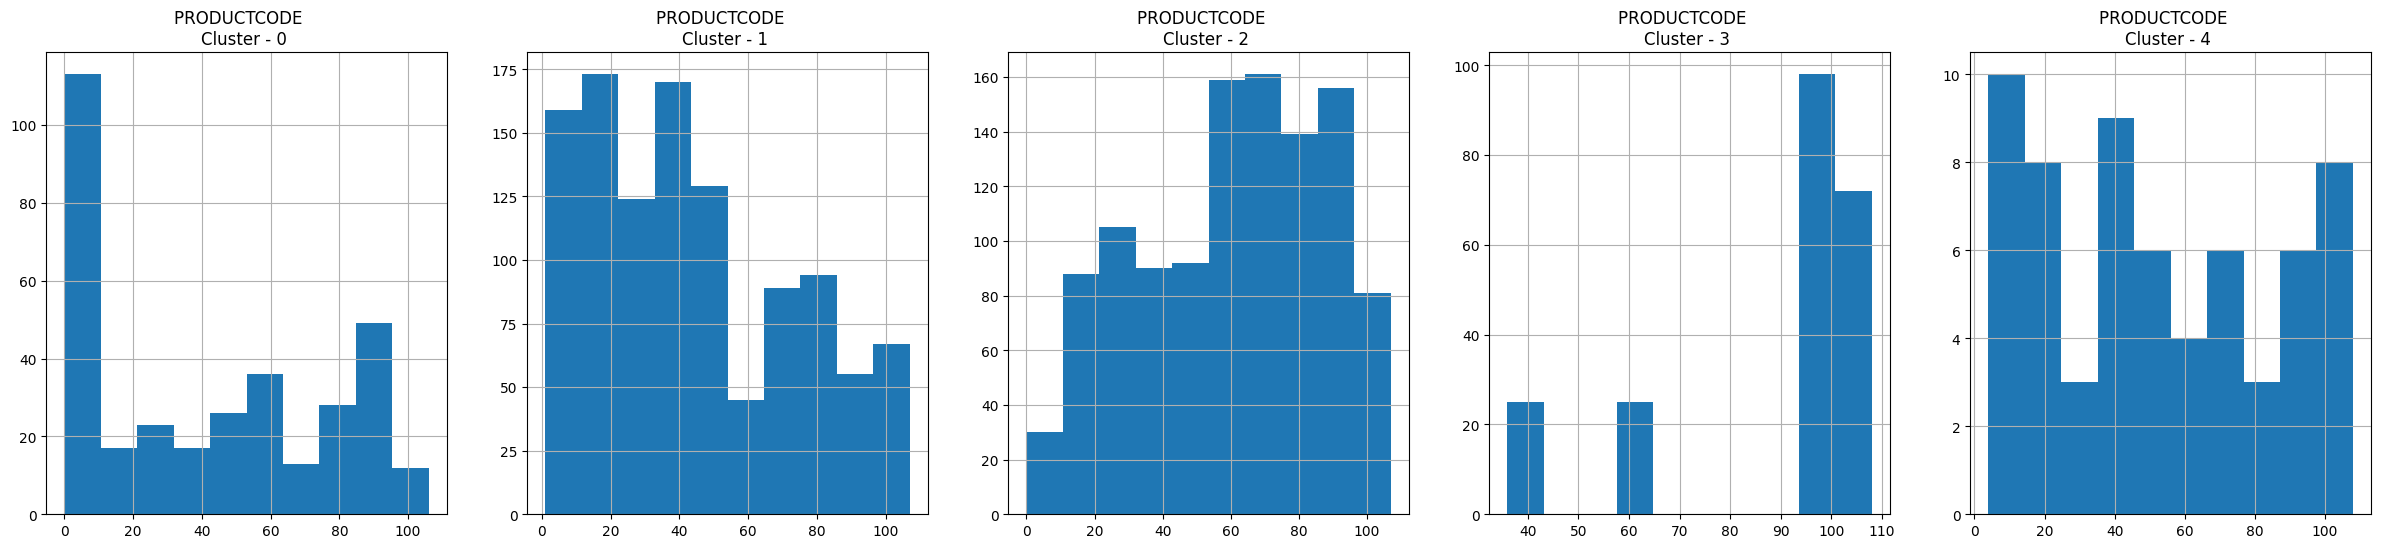

In [61]:
# Representar un histograma para cada característica según el clúster al que pertenece
for i in sales_df.columns[:8]:
  plt.figure(figsize = (30, 6))
  for j in range(5):
    plt.subplot(1, 5, j + 1)
    cluster = sale_df_cluster[sale_df_cluster['cluster'] == j]
    cluster[i].hist()
    plt.title('{}   \nCluster - {} '.format(i, j))

  plt.show()

# TAREA #8:

In [62]:
# Reducir los datos originales a 3 dimensiones usando PCA para visualizar los clústeres
pca = PCA(n_components = 3)
principal_comp = pca.fit_transform(sales_df_scaled)
principal_comp

array([[-0.48631933,  1.19523199, -1.00267727],
       [-0.78465471,  1.03283188, -1.4162651 ],
       [ 1.43146434, -0.12199648, -0.28129104],
       ...,
       [ 0.38985361, -4.12946409,  0.06056817],
       [-2.78886764, -2.38601395, -1.54986594],
       [-0.7054888 , -3.31242744,  0.51890644]])

In [64]:
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2', 'pca3'])
pca_df.head()

,pca1,pca2,pca3
0,-0.486319,1.195232,-1.002677
1,-0.784655,1.032832,-1.416265
2,1.431464,-0.121996,-0.281291
3,1.288425,0.218280,0.579360
4,1.976022,0.141698,1.061314


Podemos hacer POS u Odoo para tiendas.

In [66]:
# Concatenar las etiquetas de los clústers al dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df

,pca1,pca2,pca3,cluster
0,-0.486319,1.195232,-1.002677,0
1,-0.784655,1.032832,-1.416265,0
2,1.431464,-0.121996,-0.281291,0
3,1.288425,0.218280,0.579360,0
4,1.976022,0.141698,1.061314,0
...,...,...,...,...
2818,-2.450314,-1.113172,1.523553,3
2819,-0.158247,-3.709748,-0.640182,3
2820,0.389854,-4.129464,0.060568,3
2821,-2.788868,-2.386014,-1.549866,3


In [67]:
# Visualizar los clústeres con 3D-Scatterplot
fig = px.scatter_3d(pca_df, x = 'pca1', y = 'pca2', z = 'pca3',
                    color = 'cluster', symbol = 'cluster', size_max = 18, opacity = 0.7)
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))